In [6]:
#Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore #to remove outliers
import requests
import io
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing dataset

In [4]:
df = pd.read_csv("Advertising.csv")

# eda

In [5]:
df.head(4)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5


In [6]:
df.shape # check the data dimension

(200, 5)

In [7]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
df.drop(columns = "Unnamed: 0", inplace = True)

In [12]:
df.columns # check the column names for EDA

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [13]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## handle null values

In [14]:
df.isna().sum() #checked for null values, there are no null values in the dataset

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

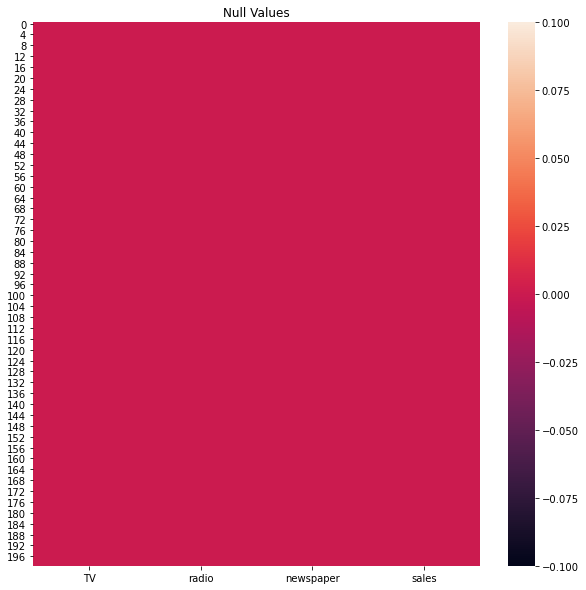

In [15]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

## check for outliers

In [16]:
#remove outliers before skewness check and before x, y split

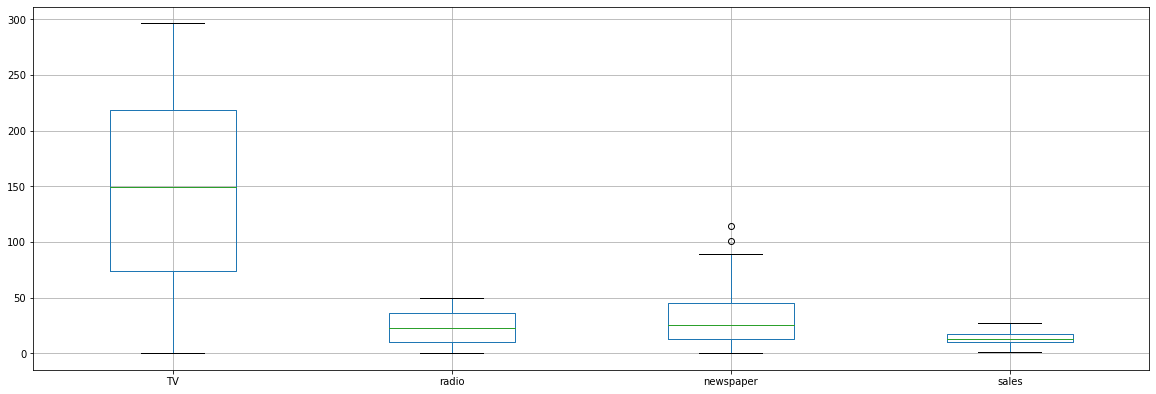

In [17]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [18]:
#Removing outliers by z score

In [19]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [20]:
new_df.shape

(198, 4)

In [21]:
df.shape

(200, 4)

In [22]:
dataloss = ((200-198)/200)*100

In [23]:
dataloss

1.0

In [24]:
#Outliers can be removed since data loss is less than 7%.
df = new_df

## check co-relation

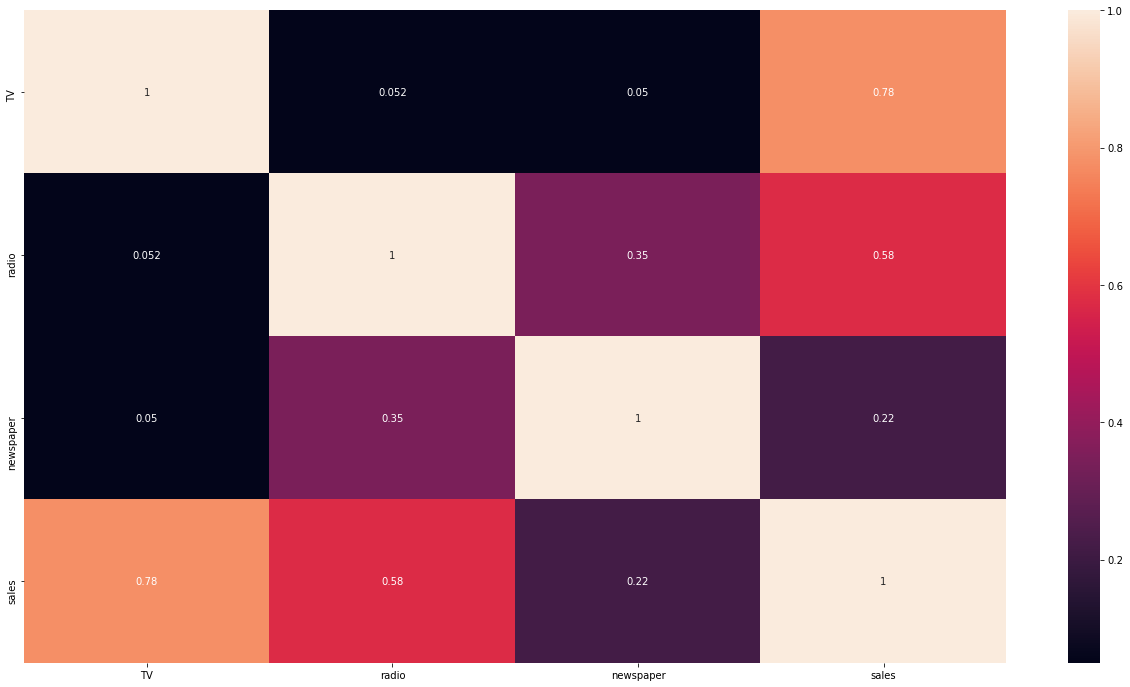

In [25]:
plt.figure(figsize=[22,12])
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [26]:
#Arrange co-relation in descending order. Dropping columns should be the last option to prevent data loss.

In [27]:
cor["sales"].sort_values(ascending=False)

sales        1.000000
TV           0.779121
radio        0.576748
newspaper    0.219555
Name: sales, dtype: float64

In [28]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [30]:
columns = ['TV', 'radio', 'newspaper', 'sales']

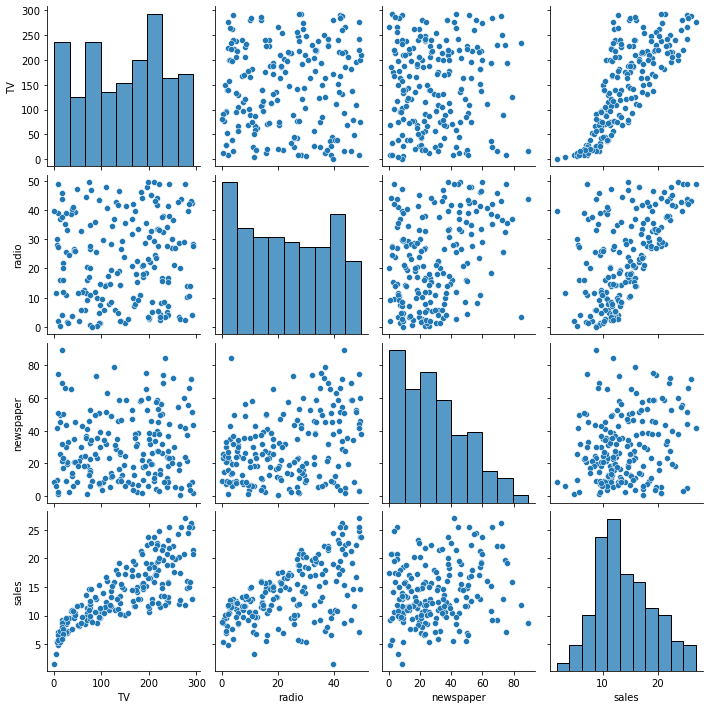

In [31]:
sns.pairplot(df[columns])

## check for skewness

In [33]:
x = df.drop('sales',axis=1)
y = df['sales']

In [34]:
x.skew() # check skewness

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

In [ ]:
#it is observed that skewness is very minimal

## test train split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## regression

In [38]:
#Linear Regression

Coefficients: 
 [ 0.0460314   0.19006409 -0.0040635 ]
MAE: 1.3865763870628827
MSE: 2.884415878619628
RMSE: 1.6983568172264707
Variance: 0.8983512177162086


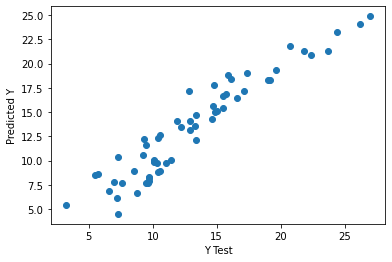

In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Variance:',metrics.explained_variance_score(y_test, predictions))

In [40]:
#CatBoostRegressor

0:	learn: 4.2747096	total: 166ms	remaining: 1.49s
1:	learn: 3.5523064	total: 167ms	remaining: 669ms
2:	learn: 2.6945604	total: 169ms	remaining: 394ms
3:	learn: 2.2943303	total: 170ms	remaining: 255ms
4:	learn: 1.9209008	total: 172ms	remaining: 172ms
5:	learn: 1.6292808	total: 173ms	remaining: 116ms
6:	learn: 1.4366217	total: 175ms	remaining: 75.1ms
7:	learn: 1.3284595	total: 176ms	remaining: 44.1ms
8:	learn: 1.2583557	total: 178ms	remaining: 19.8ms
9:	learn: 1.1524498	total: 180ms	remaining: 0us
MAE: 1.0351907400840772
MSE: 1.6324010782224039
RMSE: 1.2776545222486413
Variance: 0.9418715077043691


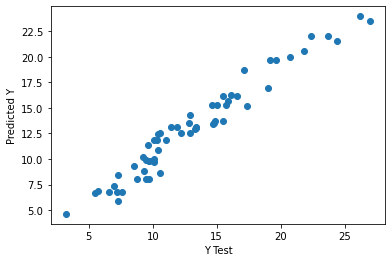

In [41]:
from catboost import CatBoostRegressor
# Initialize CatBoostRegressor
model = CatBoostRegressor(iterations=10,learning_rate=0.5,depth=2)
# Fit model
model.fit(x_train,y_train)
# Get predictions
preds = model.predict(x_test)

plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))

In [42]:
#decisiontreeregressor

MAE: 1.0537474747474749
MSE: 1.7813476713173784
RMSE: 1.3346713720303505
Variance: 0.9392547158004075


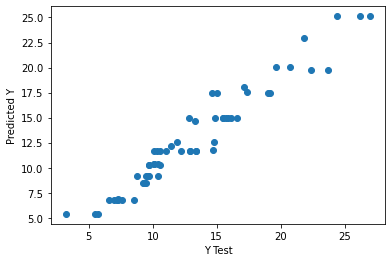

In [43]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x_train,y_train)

# Predict
preds = regr_1.predict(x_test)

# Plot the results
plt.scatter(y_test,preds)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Variance:',metrics.explained_variance_score(y_test, preds))

## check cross-validation scores

In [45]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(lm, x, y, cv=5)
print("CrossValidation Score of LinearRegression Model: ", scr.mean())

CrossValidation Score of LinearRegression Model:  0.8853605756683912


In [46]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(regr_1, x, y, cv=5)
print("CrossValidation Score of Decision Tree Model: ", scr.mean())

CrossValidation Score of Decision Tree Model:  0.9372046971631842


In [47]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(model, x, y, cv=5)
print("CrossValidation Score of Catboost Model: ", scr.mean())

0:	learn: 4.3184739	total: 559us	remaining: 5.03ms
1:	learn: 3.1698539	total: 969us	remaining: 3.88ms
2:	learn: 2.4830436	total: 1.74ms	remaining: 4.06ms
3:	learn: 2.1361648	total: 2.24ms	remaining: 3.36ms
4:	learn: 1.7153087	total: 2.61ms	remaining: 2.61ms
5:	learn: 1.5008238	total: 2.95ms	remaining: 1.96ms
6:	learn: 1.3255113	total: 3.33ms	remaining: 1.43ms
7:	learn: 1.2323494	total: 3.69ms	remaining: 923us
8:	learn: 1.1830205	total: 4.13ms	remaining: 459us
9:	learn: 1.1261097	total: 4.53ms	remaining: 0us
0:	learn: 4.3425257	total: 485us	remaining: 4.37ms
1:	learn: 3.1841492	total: 880us	remaining: 3.52ms
2:	learn: 2.4686473	total: 1.37ms	remaining: 3.2ms
3:	learn: 1.9395434	total: 1.78ms	remaining: 2.67ms
4:	learn: 1.6564814	total: 2.2ms	remaining: 2.2ms
5:	learn: 1.4863740	total: 2.6ms	remaining: 1.74ms
6:	learn: 1.3657316	total: 3.27ms	remaining: 1.4ms
7:	learn: 1.2632181	total: 4.27ms	remaining: 1.07ms
8:	learn: 1.1840122	total: 4.63ms	remaining: 514us
9:	learn: 1.1393182	total: 

## hyper parameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(x_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 6, 'min_samples_split': 10}
2.4187427806171993


In [49]:
new_model = DecisionTreeRegressor(max_depth=5,
                                  min_samples_split=50)
#or new_model = gs.best_estimator_
new_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=50)

## saving the model

In [50]:
import joblib
joblib.dump(new_model, "model.pkl") #rename as per project name
prediction = new_model.predict(x_test)

## loading the saved model

In [ ]:
model = joblib.load("model.pkl")

In [ ]:
prediction = model.predict(x_test)

In [ ]:
print(accuracy_score(y_test,prediction)*100)

In [ ]:
prediction = pd.DataFrame(prediction) # converting into dataframe

In [ ]:
prediction.to_csv("Results.csv")